Figure showing each value of timescale in the three stages for each of the MNI regions, ordered by wake and separated by lobe. 

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from mnitimescales import utils
from mnitimescales import plots

plots._set_font_params()

Imports and definitions:

In [3]:
stages = ["W", "N3", "R"]
stage_colors = {"W": "red", "N2": "cyan", "N3": "purple", "R": "green"}
title_dict = {"W": "Wake", "N2": "NREM2", "N3": "NREM3", "R": "REM"}
lobes_order = ["Occipital", "Frontal", "Parietal", "Insula", "Temporal"]

# Paths
data_path = Path("F:\\MNIOpen")
bb_path = data_path.joinpath("Results", "timescales_broadband")
gamma_path = data_path.joinpath("Results", "timescales_gamma")
fig_path = data_path.joinpath("Figures", "Fig_timescales")
fig_path.mkdir(exist_ok=True, parents=True)
df_timescales_bb = pd.concat([pd.read_csv(bb_path.joinpath(f"tau_{stage}_mni.csv"), index_col=0) for stage in stages], ignore_index=True)
df_timescales_gamma = pd.concat([pd.read_csv(gamma_path.joinpath(f"tau_{stage}_mni.csv"), index_col=0) for stage in stages], ignore_index=True)

Plot parameters:

In [4]:
# Order for plotting lobes
lobes_order = ["Occipital", "Frontal", "Parietal", "Insula", "Temporal"]

# Names to show on plot
regions_plot = {
    "Medial segment of precentral gyrus": "Precentral gyrus, medial",
    "Postcentral gyrus (including medial segment)": "Postcentral gyrus",
    "Lingual gyrus and occipital fusiform gyrus": "Lingual gyrus",
    "Opercular part of inferior frontal gyrus": "Inferior frontal gyrus, opercular",
    "Superior frontal gyrus and frontal pole": "Superior frontal gyrus",
    "Medial segment of superior frontal gyrus": "Superior frontal gyrus, medial",
    "Triangular part of inferior frontal gyrus": "Inferior frontal gyrus, triangular",
    "Orbital part of inferior frontal gyrus": "Inferior frontal gyrus, orbital",
    "Inferior ocipital gyrus and occipital pole": "Inferior ocipital gyrus"
}
regions_plot = dict(regions_plot, **{reg: reg for reg in df_timescales_bb["region"].unique() if reg not in regions_plot.keys()})

Broadband:

In [5]:
df_timescales_bb["lobe"] = pd.Categorical(df_timescales_bb["lobe"], lobes_order)
df_timescales_bb.sort_values("lobe", inplace=True)
df_timescales_bb

,pat,age,gender,chan,type,stage,region,mni_x,mni_y,mni_z,tau,lobe
0,3,46,M,GD003Lf_1,D,W,Lingual gyrus and occipital fusiform gyrus,-25.000000,-50.000000,-8.0,27.965136,Occipital
1797,47,23,F,GD047Lo_10,D,N3,Inferior ocipital gyrus and occipital pole,-36.000000,-82.000000,3.0,192.520166,Occipital
1796,47,23,F,GD047Lo_03,D,N3,Calcarine cortex,-8.000000,-81.500000,2.0,88.841893,Occipital
1795,47,23,F,GD047Lo_02,D,N3,Calcarine cortex,-4.500000,-81.000000,3.0,101.030656,Occipital
1794,47,23,F,GD047Lo_01,D,N3,Lingual gyrus and occipital fusiform gyrus,0.000000,-81.000000,3.0,49.938488,Occipital
...,...,...,...,...,...,...,...,...,...,...,...,...
1636,82,38,F,MM082LA6,M,W,Middle temporal gyrus,-49.000000,-4.000000,-25.0,44.990078,Temporal
1637,82,38,F,MM082LA7,M,W,Middle temporal gyrus,-54.500000,-3.000000,-23.0,68.406153,Temporal
1638,82,38,F,MM082LA8,M,W,Middle temporal gyrus,-60.000000,-4.000000,-24.0,49.972751,Temporal
1629,81,46,M,MD081LFus2,D,W,Fusiform and parahippocampal gyri,-42.000000,-45.500000,-17.0,27.564865,Temporal


Option 1: ordered globally

In [ ]:
# Regions ordered by median timescale
reg_order = df_timescales_bb[df_timescales_bb["stage"] == "W"][["region", "tau"]].groupby("region").median().sort_values("tau").index
reg_order = [regions_plot[reg] for reg in reg_order]

In [ ]:
# # Prepare dataframe for plotting
# df_plot = df_timescales_bb[["region", "stage", "tau"]].groupby(["region", "stage"]).median()
# df_plot = df_plot.unstack()
# df_plot.columns = df_plot.columns.droplevel(0)
# df_plot = df_plot.reset_index()
# df_plot = df_plot.melt(id_vars="region", value_vars=stages, value_name="Broadband Timescale [ms]", var_name="cond")
# df_plot = df_plot.replace({"region": regions_plot, "cond": title_dict})
# df_plot

In [6]:
# Prepare dataframe for plotting
df_plot = df_timescales_bb[["region", "stage", "tau"]].copy()
df_plot = df_plot.rename(columns={"stage": "cond", "tau": "Broadband Timescale [ms]"})
df_plot = df_plot.replace({"region": regions_plot, "cond": title_dict})
df_plot

,region,cond,Broadband Timescale [ms]
0,Lingual gyrus,Wake,27.965136
1797,Inferior ocipital gyrus,NREM3,192.520166
1796,Calcarine cortex,NREM3,88.841893
1795,Calcarine cortex,NREM3,101.030656
1794,Lingual gyrus,NREM3,49.938488
...,...,...,...
1636,Middle temporal gyrus,Wake,44.990078
1637,Middle temporal gyrus,Wake,68.406153
1638,Middle temporal gyrus,Wake,49.972751
1629,Fusiform and parahippocampal gyri,Wake,27.564865


In [ ]:
fig, ax = plt.subplots(figsize=plots._get_figsize_inches((17.4, 12)), dpi=300, layout="constrained")

plots.plot_conds_regs(ax, df_plot, sep=0.5, colors_cond={"Wake": "r", "NREM3": "purple", "REM": "g"},
                      reg_order=reg_order, cond_order=["Wake", "NREM3", "REM"], markersize=9)
ax.set_ylim(0, 300)

plt.show()

Option 2: ordered within lobe

In [8]:
# Regions ordered by median timescale per lobe
reg_order = df_timescales_bb[df_timescales_bb["stage"] == "W"][["lobe", "region", "tau"]].groupby(["lobe", "region"]).median().sort_values("tau").dropna()
reg_order = reg_order.reset_index((1, 0))
reg_order["lobe"] = pd.Categorical(reg_order["lobe"], lobes_order)
reg_order.sort_values(["lobe", "tau"], inplace=True)
reg_order = [regions_plot[reg] for reg in reg_order["region"]]

C:\Users\ricca\AppData\Local\Temp\ipykernel_26332\1150471911.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  reg_order = df_timescales_bb[df_timescales_bb["stage"] == "W"][["lobe", "region", "tau"]].groupby(["lobe", "region"]).median().sort_values("tau").dropna()


In [9]:
df_regions = df_timescales_bb.groupby("lobe")["region"].unique()
df_regions_len = df_regions.apply(lambda x: len(x)).cumsum()
df_regions_len = df_regions_len - 1

C:\Users\ricca\AppData\Local\Temp\ipykernel_26332\465429138.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_regions = df_timescales_bb.groupby("lobe")["region"].unique()


In [7]:
# Prepare dataframe for plotting
df_plot = df_timescales_bb[["region", "stage", "tau"]].copy()
df_plot = df_plot.rename(columns={"stage": "cond", "tau": "Broadband Timescale [ms]"})
df_plot = df_plot.replace({"region": regions_plot, "cond": title_dict})
df_plot

,region,cond,Broadband Timescale [ms]
0,Lingual gyrus,Wake,27.965136
1797,Inferior ocipital gyrus,NREM3,192.520166
1796,Calcarine cortex,NREM3,88.841893
1795,Calcarine cortex,NREM3,101.030656
1794,Lingual gyrus,NREM3,49.938488
...,...,...,...
1636,Middle temporal gyrus,Wake,44.990078
1637,Middle temporal gyrus,Wake,68.406153
1638,Middle temporal gyrus,Wake,49.972751
1629,Fusiform and parahippocampal gyri,Wake,27.564865


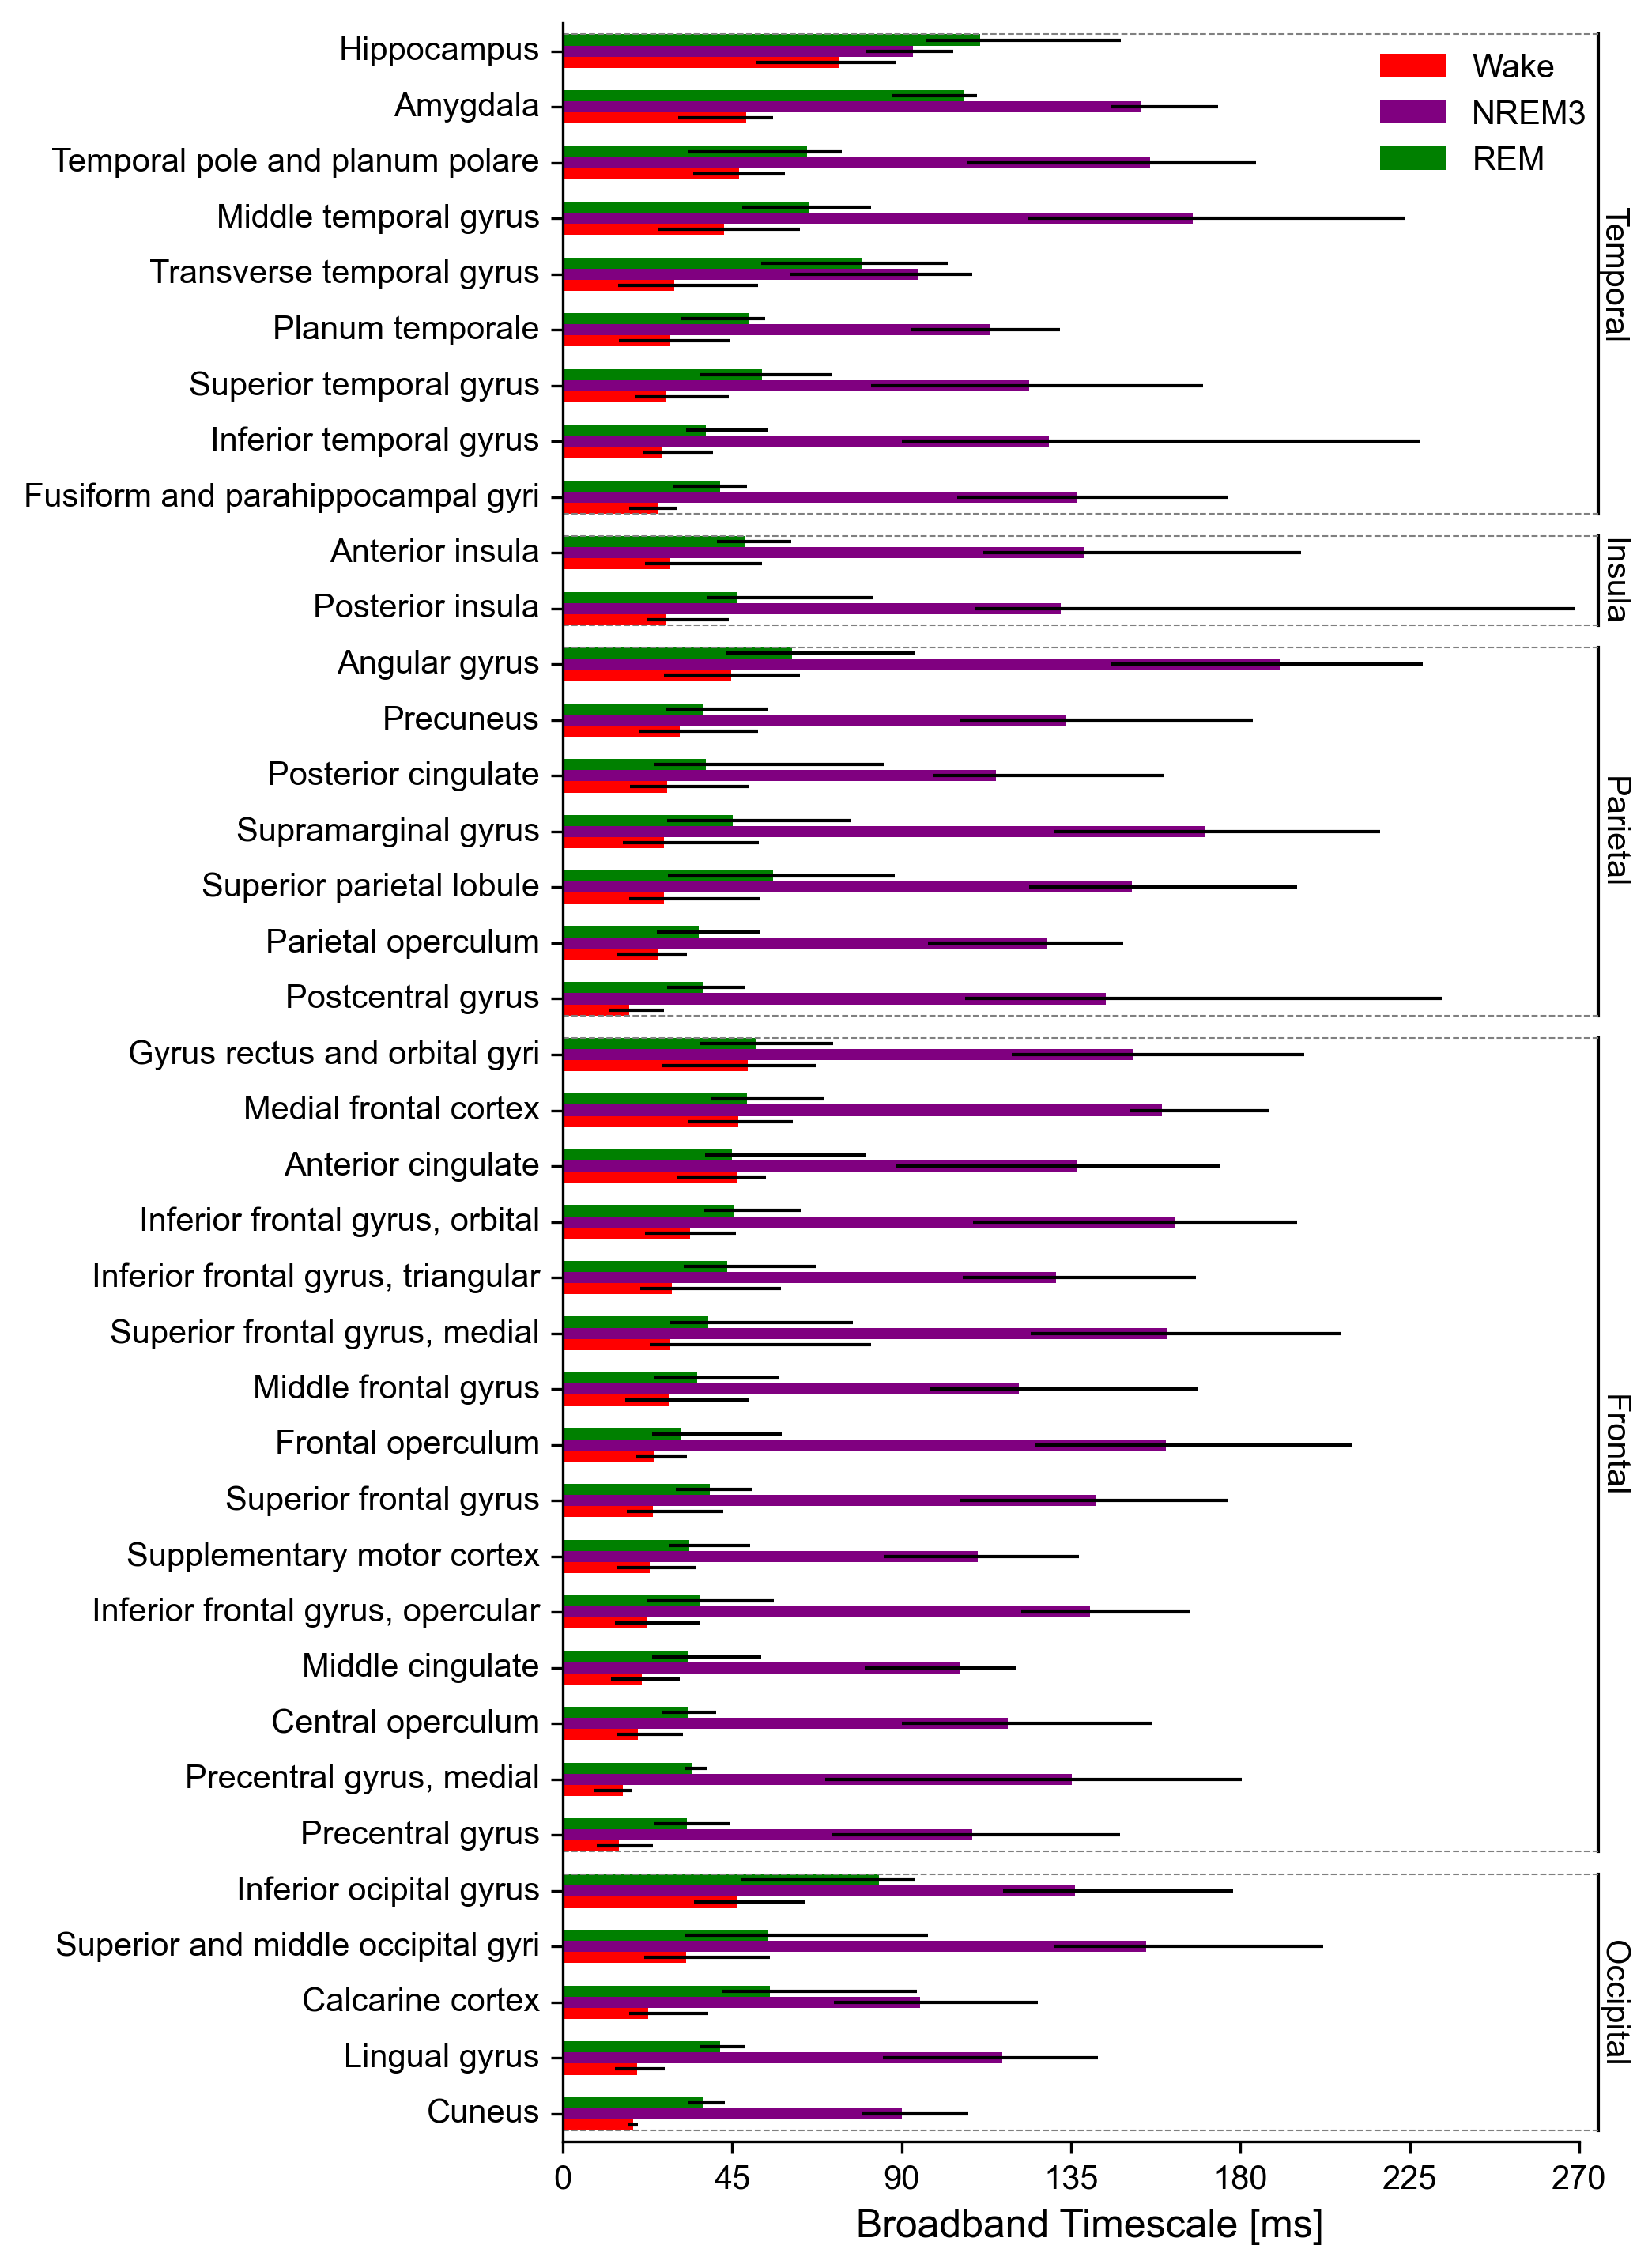

In [10]:
fig, ax = plt.subplots(figsize=plots._get_figsize_inches((17.4, 24)), dpi=300, layout="constrained")

dodge = 0.4
plots.plot_conds_regs(ax, df_plot, sep=dodge, colors_cond={"Wake": "r", "NREM3": "purple", "REM": "g"},
                      reg_order=reg_order, cond_order=["Wake", "NREM3", "REM"], markersize=6, plot_type="bar")
ax.set_xlim(0, 280)
plots._format_spines(ax, s_bounds={"bottom": (0, 270)})
ax.set_xticks(np.arange(0, 271, 45), labels=np.arange(0, 271, 45), fontsize=plots.fsize.TICK_SIZE)
ax.set_ylim(-1, 75)

idx_plot = 0
max_plot = 275
for i, lobe in enumerate(df_regions_len.index):
    ax.plot([max_plot, max_plot], [idx_plot * 2 - 1.5 * dodge, df_regions_len[lobe] * 2 + 1.5 * dodge], lw=1, c="k")
    ax.plot([0, max_plot], [idx_plot * 2 - 1.5 * dodge, idx_plot * 2 - 1.5 * dodge], lw=0.5, ls="--", c="grey")
    ax.plot([0, max_plot], [df_regions_len[lobe] * 2 + 1.5 * dodge, df_regions_len[lobe] * 2 + 1.5 * dodge], lw=0.5, ls="--", c="grey")

    ax.annotate(lobe, (max_plot, (df_regions_len[lobe] + idx_plot) * 2 / 2), va="center", rotation=-90, fontsize=plots.fsize.TEXT_SIZE)
    idx_plot = df_regions_len[lobe] + 1


# Annotate panel
# ax.text(-0.3, 1., "A", transform=ax.transAxes, size=16, weight='bold')

# Save figure
plots.save_figure(fig, fig_path.joinpath(f"mni_order_broadband.svg"))

plt.show()

### Gamma

In [11]:
df_timescales_gamma["lobe"] = pd.Categorical(df_timescales_gamma["lobe"], lobes_order)
df_timescales_gamma.sort_values("lobe", inplace=True)
df_timescales_gamma

,pat,age,gender,chan,type,stage,region,mni_x,mni_y,mni_z,tau,lobe
0,3,46,M,GD003Lf_1,D,W,Lingual gyrus and occipital fusiform gyrus,-25.000000,-50.000000,-8.0,25.040990,Occipital
1797,47,23,F,GD047Lo_10,D,N3,Inferior ocipital gyrus and occipital pole,-36.000000,-82.000000,3.0,74.853005,Occipital
1796,47,23,F,GD047Lo_03,D,N3,Calcarine cortex,-8.000000,-81.500000,2.0,47.718439,Occipital
1795,47,23,F,GD047Lo_02,D,N3,Calcarine cortex,-4.500000,-81.000000,3.0,71.509535,Occipital
1794,47,23,F,GD047Lo_01,D,N3,Lingual gyrus and occipital fusiform gyrus,0.000000,-81.000000,3.0,44.214275,Occipital
...,...,...,...,...,...,...,...,...,...,...,...,...
1636,82,38,F,MM082LA6,M,W,Middle temporal gyrus,-49.000000,-4.000000,-25.0,22.546154,Temporal
1637,82,38,F,MM082LA7,M,W,Middle temporal gyrus,-54.500000,-3.000000,-23.0,19.355482,Temporal
1638,82,38,F,MM082LA8,M,W,Middle temporal gyrus,-60.000000,-4.000000,-24.0,30.397334,Temporal
1629,81,46,M,MD081LFus2,D,W,Fusiform and parahippocampal gyri,-42.000000,-45.500000,-17.0,17.268694,Temporal


In [12]:
# Regions ordered by median timescale per lobe
reg_order = df_timescales_gamma[df_timescales_gamma["stage"] == "W"][["lobe", "region", "tau"]].groupby(["lobe", "region"]).median().sort_values("tau").dropna()
reg_order = reg_order.reset_index((1, 0))
reg_order["lobe"] = pd.Categorical(reg_order["lobe"], lobes_order)
reg_order.sort_values(["lobe", "tau"], inplace=True)
reg_order = [regions_plot[reg] for reg in reg_order["region"]]

C:\Users\ricca\AppData\Local\Temp\ipykernel_26332\3189813964.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  reg_order = df_timescales_gamma[df_timescales_gamma["stage"] == "W"][["lobe", "region", "tau"]].groupby(["lobe", "region"]).median().sort_values("tau").dropna()


In [13]:
df_regions = df_timescales_gamma.groupby("lobe")["region"].unique()
df_regions_len = df_regions.apply(lambda x: len(x)).cumsum()
df_regions_len = df_regions_len - 1

C:\Users\ricca\AppData\Local\Temp\ipykernel_26332\4132486541.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_regions = df_timescales_gamma.groupby("lobe")["region"].unique()


In [17]:
# Prepare dataframe for plotting
df_plot = df_timescales_gamma[["region", "stage", "tau"]].copy()
df_plot = df_plot.rename(columns={"stage": "cond", "tau": "Gamma Timescale [ms]"})
df_plot = df_plot.replace({"region": regions_plot, "cond": title_dict})
df_plot

,region,cond,Gamma Timescale [ms]
0,Lingual gyrus,Wake,25.040990
1797,Inferior ocipital gyrus,NREM3,74.853005
1796,Calcarine cortex,NREM3,47.718439
1795,Calcarine cortex,NREM3,71.509535
1794,Lingual gyrus,NREM3,44.214275
...,...,...,...
1636,Middle temporal gyrus,Wake,22.546154
1637,Middle temporal gyrus,Wake,19.355482
1638,Middle temporal gyrus,Wake,30.397334
1629,Fusiform and parahippocampal gyri,Wake,17.268694


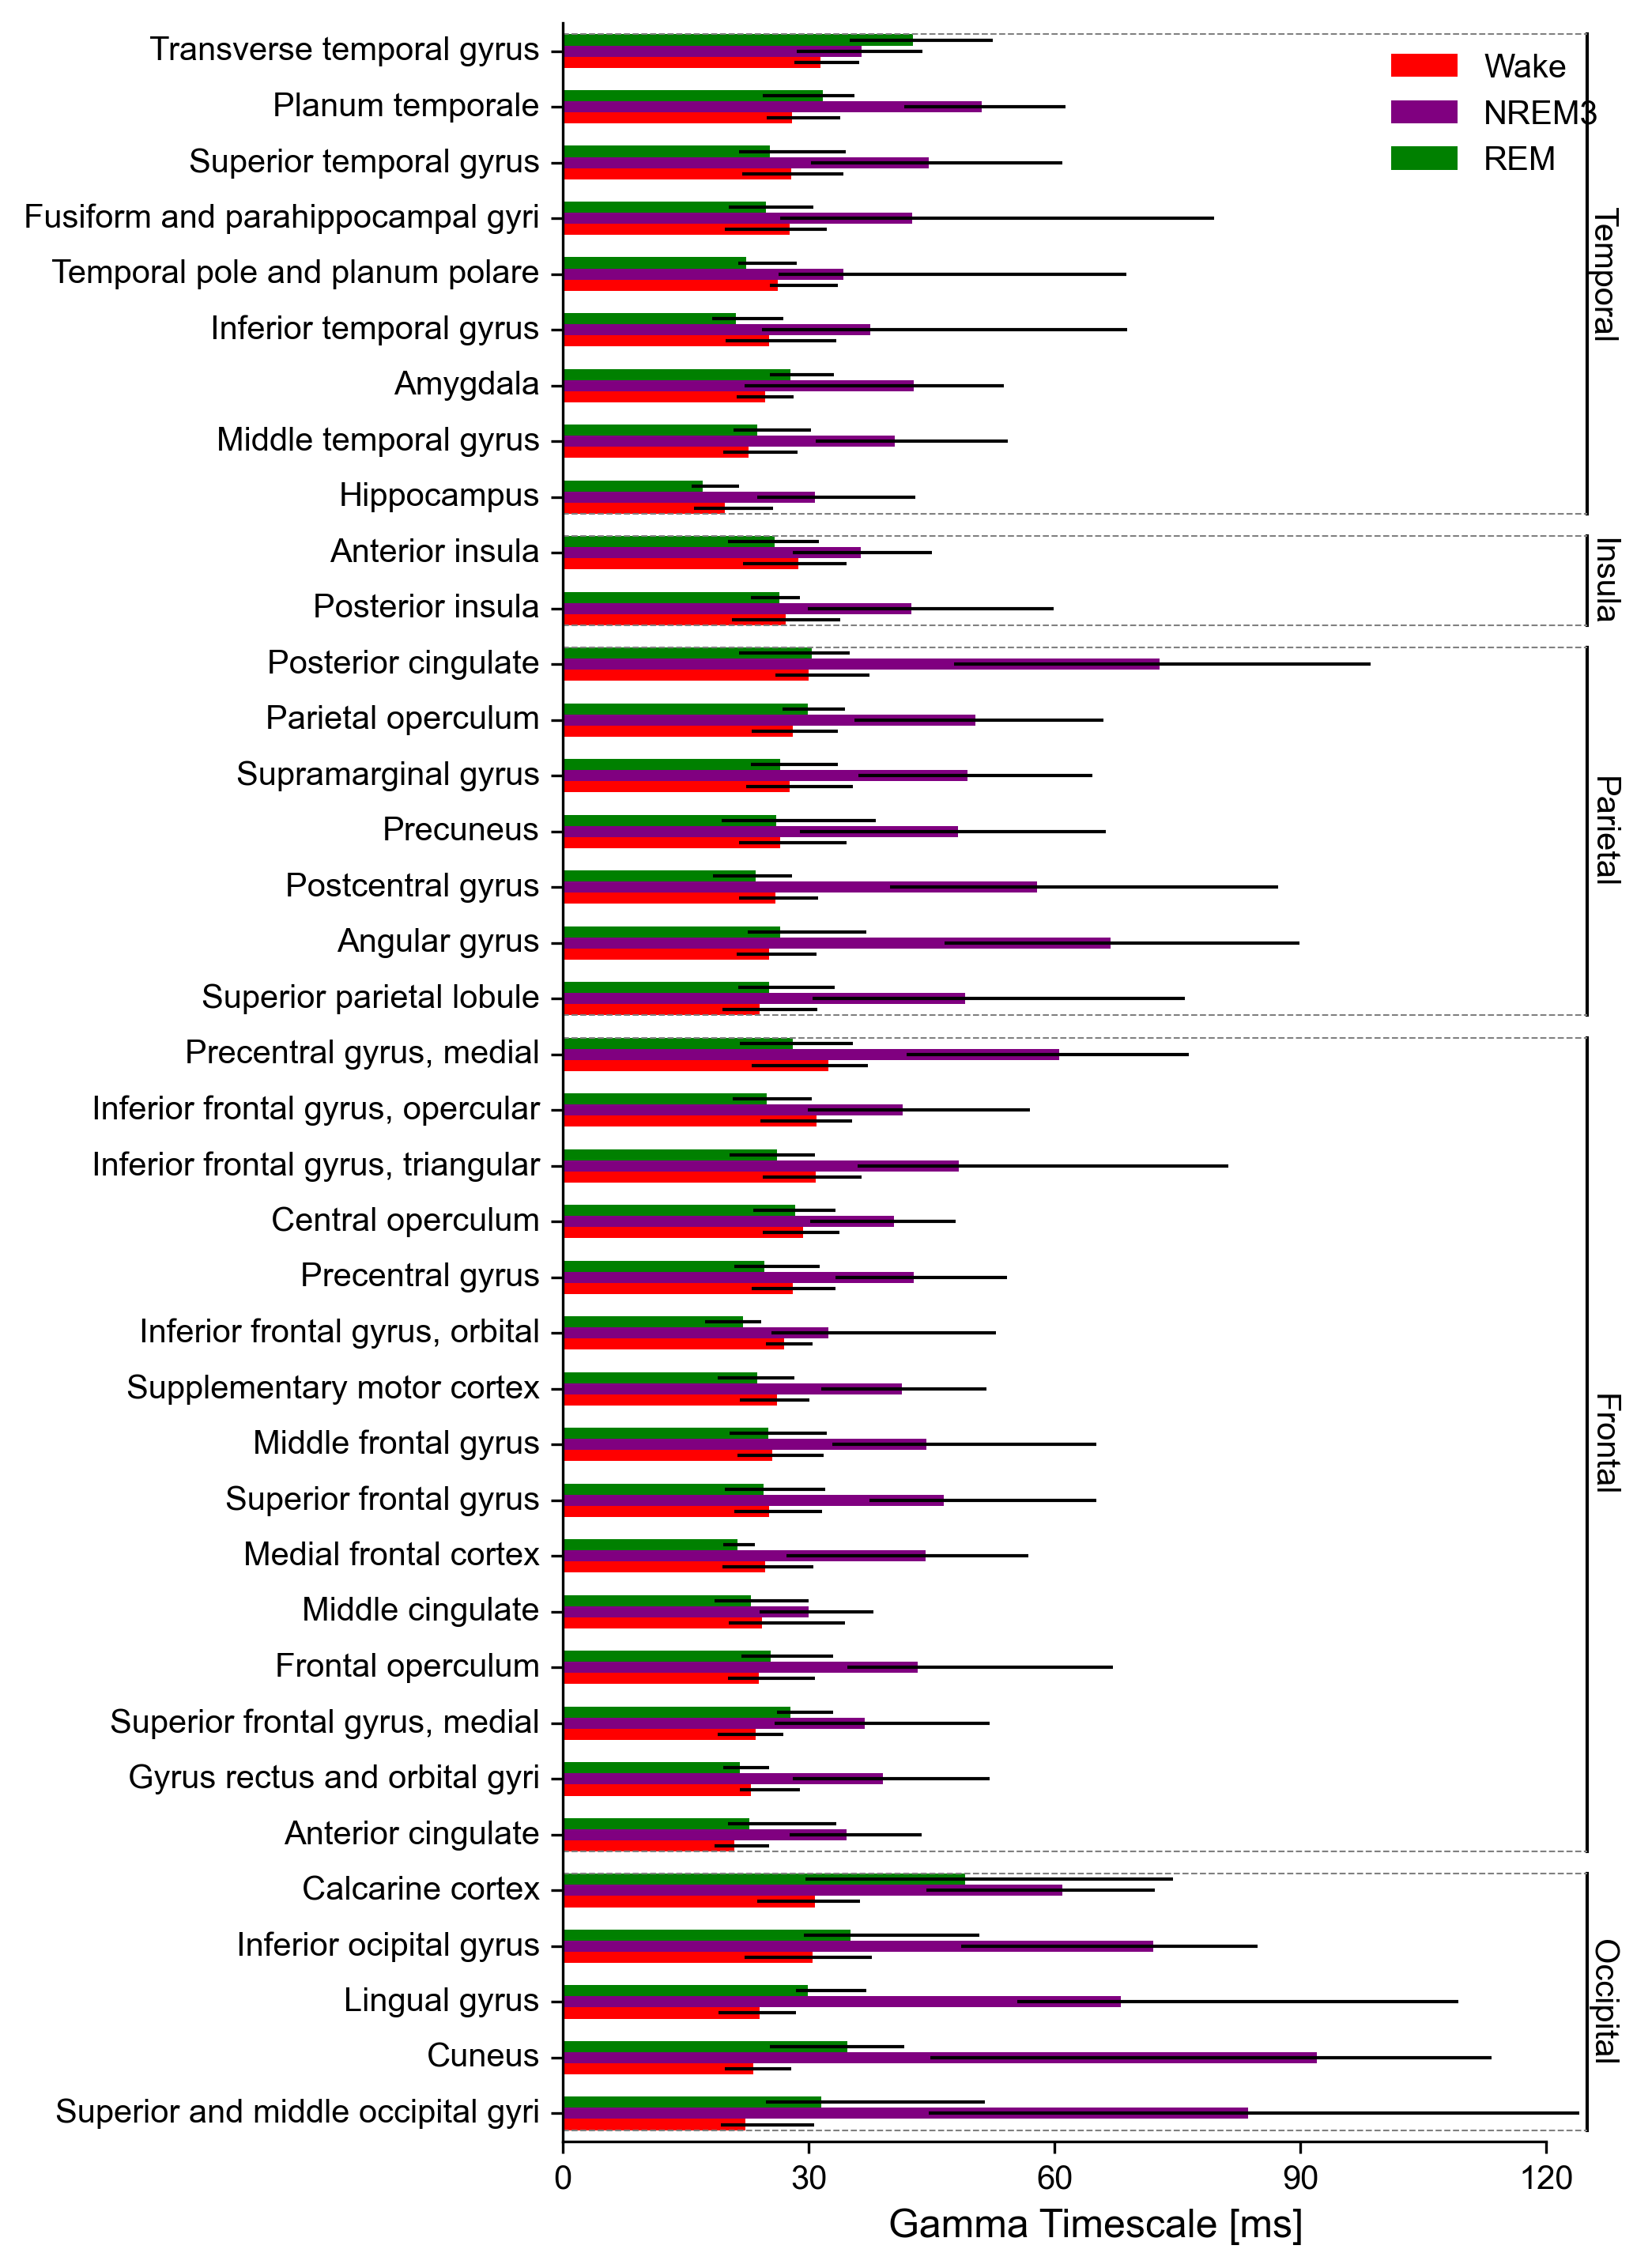

In [21]:
fig, ax = plt.subplots(figsize=plots._get_figsize_inches((17.4, 24)), dpi=300, layout="constrained")

dodge = 0.4
plots.plot_conds_regs(ax, df_plot, sep=dodge, colors_cond={"Wake": "r", "NREM3": "purple", "REM": "g"},
                      reg_order=reg_order, cond_order=["Wake", "NREM3", "REM"], markersize=6, plot_type="bar")
ax.set_xlim(0, 130)
plots._format_spines(ax, s_bounds={"bottom": (0, 120)})
ax.set_xticks(np.arange(0, 121, 30), labels=np.arange(0, 121, 30), fontsize=plots.fsize.TICK_SIZE)
ax.set_ylim(-1, 75)

idx_plot = 0
max_plot = 125
for i, lobe in enumerate(df_regions_len.index):
    ax.plot([max_plot, max_plot], [idx_plot * 2 - 1.5 * dodge, df_regions_len[lobe] * 2 + 1.5 * dodge], lw=1, c="k")
    ax.plot([0, max_plot], [idx_plot * 2 - 1.5 * dodge, idx_plot * 2 - 1.5 * dodge], lw=0.5, ls="--", c="grey")
    ax.plot([0, max_plot], [df_regions_len[lobe] * 2 + 1.5 * dodge, df_regions_len[lobe] * 2 + 1.5 * dodge], lw=0.5, ls="--", c="grey")

    ax.annotate(lobe, (max_plot, (df_regions_len[lobe] + idx_plot) * 2 / 2), va="center", rotation=-90, fontsize=plots.fsize.TEXT_SIZE)
    idx_plot = df_regions_len[lobe] + 1


# Annotate panel
# ax.text(-0.3, 1., "B", transform=ax.transAxes, size=16, weight='bold')

# Save figure
plots.save_figure(fig, fig_path.joinpath(f"mni_order_gamma.svg"))

plt.show()